# Substance Use and Academic Performance

## Overview

[Overview Paragraph]

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import nbinom, poisson
import random

### Alcohol

In [ ]:
# Study Measures
alc_quantity = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
gpa_vals = ['4', '3', '2', '1']

a_probabilities = []
b_probabilities = []
c_probabilities = []
f_probabilities = []

# Estimated probabilities for number of drinks using Poisson distribution and given means
for x in range(len(alc_quantity)-1):
    prob = poisson.pmf(x, mu=2.22)
    a_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.37)
    b_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.60)
    c_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.91)
    f_probabilities.append(prob)

# Probability for 10 or moredrinks
a_probabilities.append(1 - poisson.cdf(9, mu=2.8))
b_probabilities.append(1 - poisson.cdf(9, mu=3.6))
c_probabilities.append(1 - poisson.cdf(9, mu=3.876))
f_probabilities.append(1 - poisson.cdf(9, mu=3.748))

# Simulated Sample Data
n = 22424
data = {'GPA': [], 'Number of Drinks': []}
for student in range(n):
    gpa = random.choices(gpa_vals, weights=[0.27, 0.38, 0.21, 0.14])[0]
    if gpa == '4':
        drinks = random.choices(alc_quantity, weights=a_probabilities)[0]
    elif gpa == '3':
        drinks = random.choices(alc_quantity, weights=b_probabilities)[0]
    elif gpa == '2':
        drinks = random.choices(alc_quantity, weights=c_probabilities)[0]
    else:
        drinks = random.choices(alc_quantity, weights=f_probabilities)[0]
    data['GPA'].append(gpa)
    data['Number of Drinks'].append(drinks)

<Axes: xlabel='Number of Drinks', ylabel='Count'>

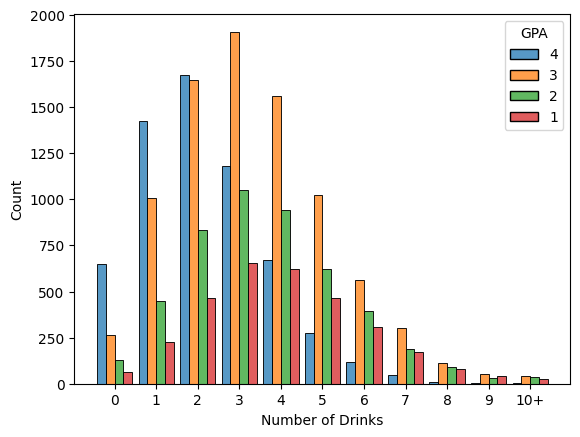

In [70]:
# convert data dict to DataFrame and ensure categorical ordering for the x-axis
df = pd.DataFrame(data)
df['Number of Drinks'] = pd.Categorical(df['Number of Drinks'], categories=alc_quantity, ordered=True)

# seaborn.histplot does not accept 'order' — use discrete=True and pass the DataFrame
sns.histplot(data=df, x='Number of Drinks', hue='GPA', multiple='dodge', shrink=0.85, discrete=True, hue_order=gpa_vals)

Text(0.5, 1.0, 'Scatter Plot of Number of Drinks vs GPA')

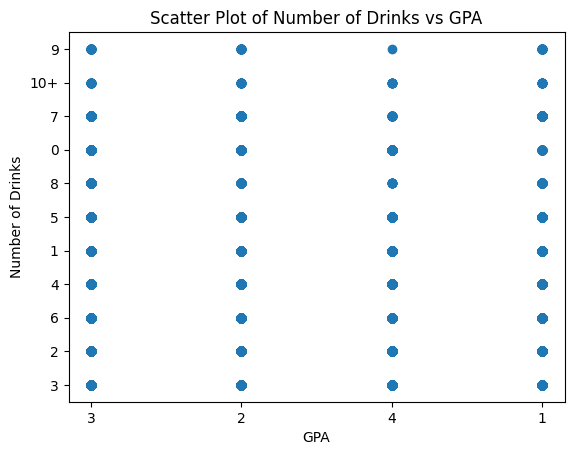

In [53]:
plt.scatter(data['GPA'], data['Number of Drinks'])
plt.xlabel('GPA')
plt.ylabel('Number of Drinks')
plt.title('Scatter Plot of Number of Drinks vs GPA')

### Marijuana

### Vaping